<a href="https://colab.research.google.com/github/CrauxZz/Python/blob/main/An%C3%A1lisis_el%C3%A9trica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

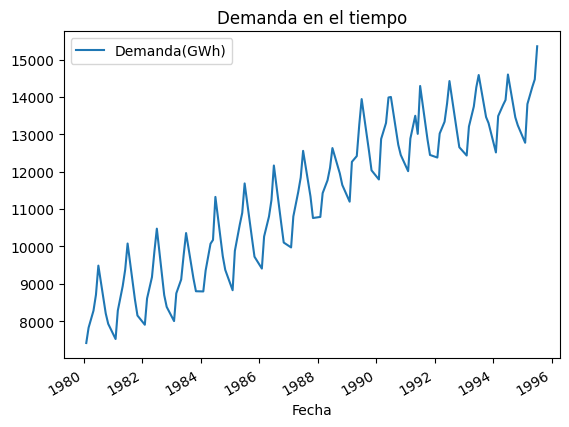

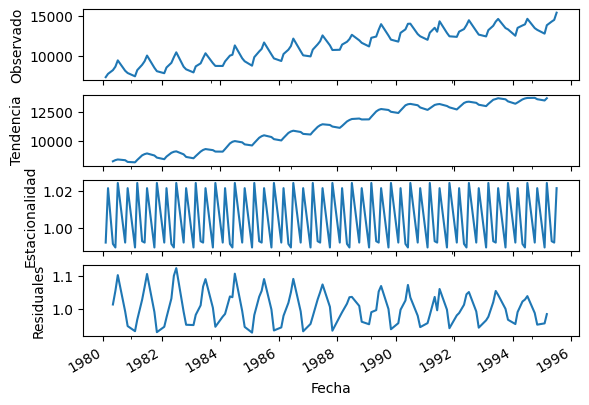

Resultado de la prueba de Dickey-Fuller:
Test Statistic                  -1.117293
p-value                          0.708127
#Lags Used                      14.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64


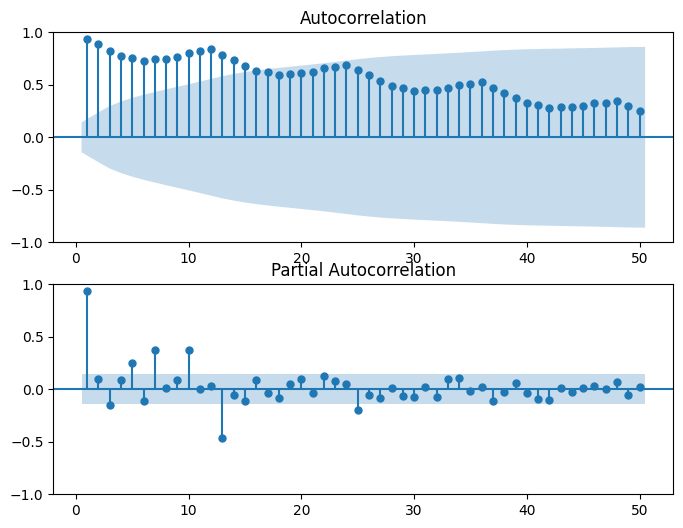

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


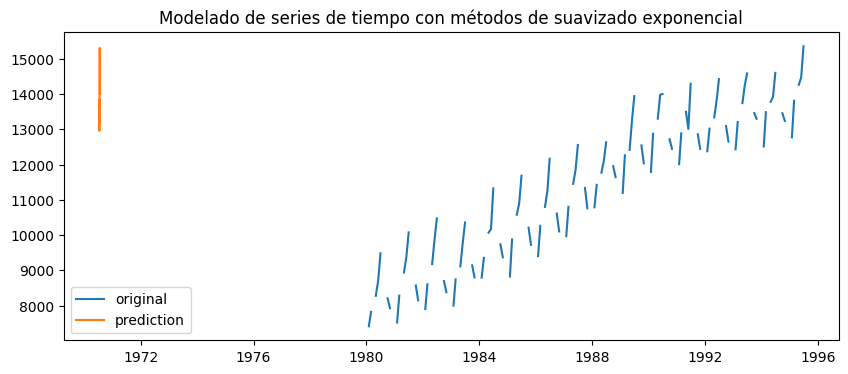

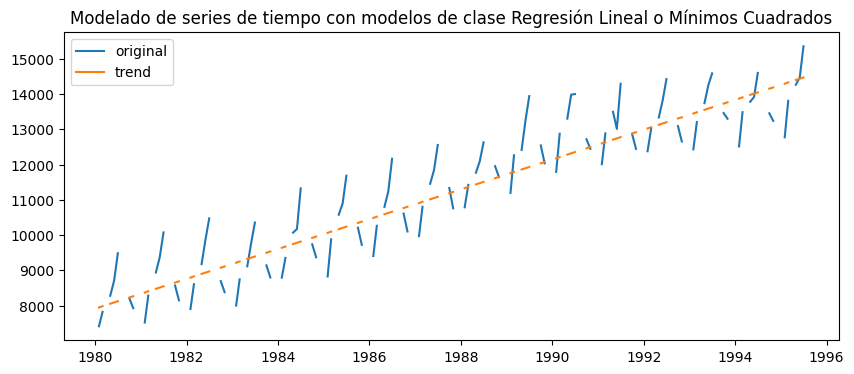

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:           Demanda(GWh)   No. Observations:                  188
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1452.666
Date:                Sun, 07 Apr 2024   AIC                           2917.332
Time:                        14:21:46   BIC                           2936.719
Sample:                             0   HQIC                          2925.188
                                - 188                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1053      0.076     -1.377      0.168      -0.255       0.045
ar.L2          0.2640      0.079      3.331      0.001       0.109       0.419
ar.L3         -0.2117      0.077     -2.737      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


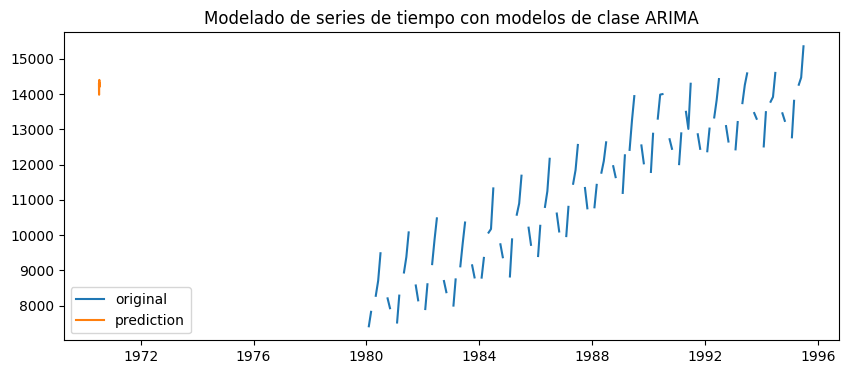

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

# Cargar los datos
#Se establece la ruta al archivo csv
df = pd.read_csv('/content/Demanda_electricidad_mensual.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b-%y', errors='coerce')
df.set_index('Fecha', inplace=True)

# Visualizar la demanda en el tiempo
df.plot()
plt.title('Demanda en el tiempo')
plt.show()

# Descomposición de las series de tiempo
result = seasonal_decompose(df.dropna(), model='multiplicative', period=8)

# Eliminar los valores NaN de los resultados de la descomposición
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
resid = result.resid.dropna()

# Graficar los componentes de la descomposición
fig, axes = plt.subplots(4, 1, sharex=True)
df.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observado')
trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Tendencia')
seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Estacionalidad')
resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residuales')
plt.show()

# Prueba de estacionariedad de Dickey-Fuller y gráficos de autocorrelación
print('Resultado de la prueba de Dickey-Fuller:')
dftest = adfuller(df.iloc[:, 0], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6))
plot_acf(df, lags=50, zero=False, ax=ax1)
plot_pacf(df, lags=50, zero=False, ax=ax2)
plt.show()

# Modelado de series de tiempo con suavizado exponencial
model = ExponentialSmoothing(df.iloc[:, 0], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()
pred = model_fit.predict(start=len(df), end=len(df)+12)
plt.figure(figsize=(10,4))
plt.plot(df, label='original')
plt.plot(pred, label='prediction')
plt.title('Modelado de series de tiempo con métodos de suavizado exponencial')
plt.legend()
plt.show()

# Modelado de series de tiempo con regresión lineal
X = np.array(range(len(df))).reshape(-1, 1)
y = df.values
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.figure(figsize=(10,4))
plt.plot(df.index, y, label='original')
plt.plot(df.index, trend, label='trend')
plt.title('Modelado de series de tiempo con modelos de clase Regresión Lineal o Mínimos Cuadrados')
plt.legend()
plt.show()

# Modelado de series de tiempo con ARIMA
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit(method_kwargs={"disp": 0})
print(model_fit.summary())
pred = model_fit.predict(start=len(df), end=len(df)+12)
plt.figure(figsize=(10,4))
plt.plot(df, label='original')
plt.plot(pred, label='prediction')
plt.title('Modelado de series de tiempo con modelos de clase ARIMA')
plt.legend()
plt.show()